# using Decision Tree 

In [25]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
reg_method= ['Decision Tree one level', 
            'Decision Tree multi level optimized', 
            'Forest regression', 
            'Linear model']
def print_model_performance(model, y, prediction, reg_method_id):
    # print ('coeffecient:', model.coef_)
    # print ('intercept: ', model.intercept_)

    print (f'Mean squared Error (MSE): {mean_squared_error(y, prediction):.2f}')
    print (f'Mean absolute Error (MAE): {mean_absolute_error(y, prediction):.2f}')
    print (f'Coeffecint of determination (R2): {r2_score(y, prediction):.2f}')
    plt.figure()
    p= sns.regplot(x=y, y=prediction, marker = '+')
    p= p.set_title(reg_method[reg_method_id])
    

# Use Decision Tree Regression - One leaf

In [27]:
def reg_decision_tree_1(train_X, val_X, train_y, val_y):
    # Specify Model
    iowa_model = DecisionTreeRegressor(random_state=1)
    # Fit Model
    iowa_model.fit(train_X, train_y)

    # Make validation predictions and calculate mean absolute error
    val_predictions = iowa_model.predict(val_X)
    val_mae = mean_absolute_error(val_predictions, val_y)
    # print("Validation MAE: {:,.0f}".format(val_mae))
    print_model_performance(iowa_model, val_y, val_predictions, 0)


# Use Decision Tree with optimizating max_leaf_nodes

In [28]:
# model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [29]:
def reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y):
    candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
    # Write loop to find the ideal tree size from candidate_max_leaf_nodes
    mae=[]
    for i, max_leaf in enumerate(candidate_max_leaf_nodes):
        #print (i, max_leaf)
        x = get_mae(max_leaf, train_X, val_X, train_y, val_y)
        mae.append(x)
        print(f"Max leaf nodes: {max_leaf}  \t\t Mean Absolute Error:  {x}")
        
    # Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
    m = mae.index(min(mae))
    best_tree_size = candidate_max_leaf_nodes[m]

    final_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=0)
    # fit the final model 
    final_model.fit(X, y)
    pred = final_model.predict(val_X)
    print_model_performance(final_model, val_y, pred, 1)

# Use Random Forest regression model

In [30]:

# from sklearn.metrics import mean_absolute_error
def use_forest_regression(train_X, val_X, train_y, val_y):
    forest_model = RandomForestRegressor(random_state=1)
    forest_model.fit(train_X, train_y)
    melb_preds = forest_model.predict(val_X)
    print_model_performance(forest_model, val_y, melb_preds, 2)

# Use Linear model regression

In [31]:
def use_linear_model(train_X, eval_X, train_y, eval_y):
    model = linear_model.LinearRegression()
    model.fit(train_X, train_y)
    pred = model.predict(eval_X)
    print_model_performance(model, eval_y, pred,3)
    # print ('Mead squared Error (MSE):', mean_squared_error(val_y, pred))

# Regression analysis of "train data set" using 4 methods

************ Decision Tree one level ***************
Mean squared Error (MSE): 1778907187.10
Mean absolute Error (MAE): 28991.88
Coeffecint of determination (R2): 0.70

************ Decision Tree multi level optimized ***************
Max leaf nodes: 5  		 Mean Absolute Error:  38652.80781968424
Max leaf nodes: 25  		 Mean Absolute Error:  29768.229686180715
Max leaf nodes: 50  		 Mean Absolute Error:  28046.85516105481
Max leaf nodes: 100  		 Mean Absolute Error:  26512.992103332337
Max leaf nodes: 250  		 Mean Absolute Error:  27058.102733988762
Max leaf nodes: 500  		 Mean Absolute Error:  28011.747506023774
Mean squared Error (MSE): 525601881.61
Mean absolute Error (MAE): 17237.85
Coeffecint of determination (R2): 0.91

************ User Forest model regression ***************
Mean squared Error (MSE): 1195850239.80
Mean absolute Error (MAE): 22811.10
Coeffecint of determination (R2): 0.80

************ Linear Model ***************
Mean squared Error (MSE): 1595246908.76
Mean absolu

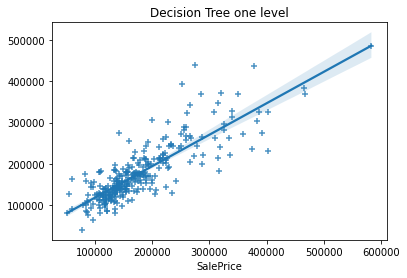

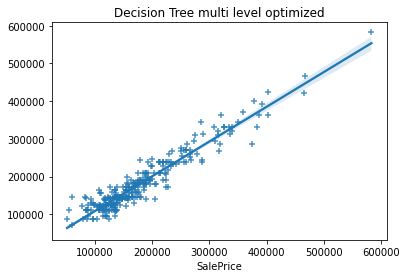

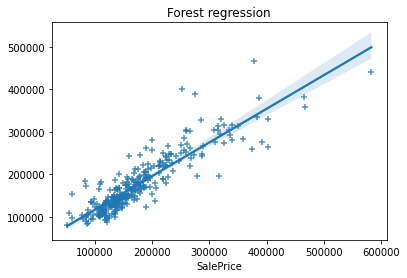

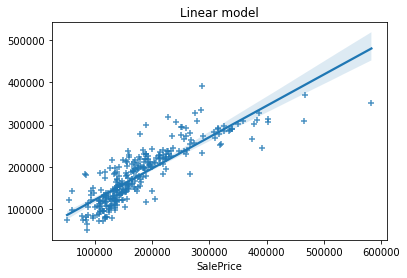

In [32]:
iowa_file_path = r"C:\Yahia\Python\ML\data\train.csv"
home_data = pd.read_csv(iowa_file_path)

y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2)

print ('************ Decision Tree one level ***************')
reg_decision_tree_1(train_X, val_X, train_y, val_y)

print ('\n************ Decision Tree multi level optimized ***************')
reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y)

print ('\n************ User Forest model regression ***************')
use_forest_regression(train_X, val_X, train_y, val_y)

print ('\n************ Linear Model ***************')
use_linear_model(train_X, val_X, train_y, val_y)

# Regression Analysis of "Boston House data" 

************ Decision Tree one level ***************
Mean squared Error (MSE): 21.46
Mean absolute Error (MAE): 2.67
Coeffecint of determination (R2): 0.69

************ Decision Tree multi level optimized ***************
Max leaf nodes: 5  		 Mean Absolute Error:  3.3709159691519166
Max leaf nodes: 25  		 Mean Absolute Error:  2.6781490861151656
Max leaf nodes: 50  		 Mean Absolute Error:  2.7088909182841894
Max leaf nodes: 100  		 Mean Absolute Error:  2.6451212279326466
Max leaf nodes: 250  		 Mean Absolute Error:  2.6349999999999993
Max leaf nodes: 500  		 Mean Absolute Error:  2.6225490196078427
Mean squared Error (MSE): 1.22
Mean absolute Error (MAE): 0.91
Coeffecint of determination (R2): 0.98

************ User Forest model regression ***************
Mean squared Error (MSE): 8.53
Mean absolute Error (MAE): 2.04
Coeffecint of determination (R2): 0.88

************ Linear Model ***************
Mean squared Error (MSE): 22.78
Mean absolute Error (MAE): 3.44
Coeffecint of determin

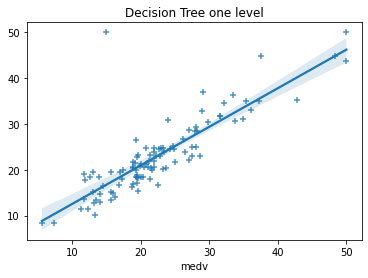

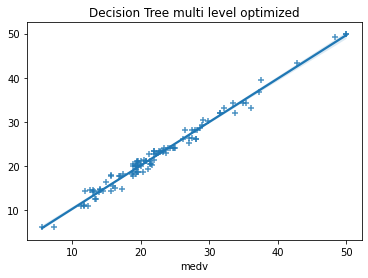

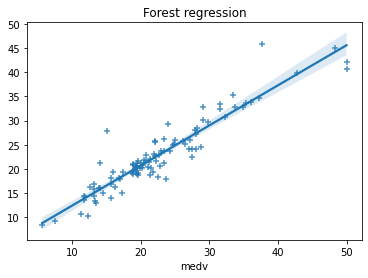

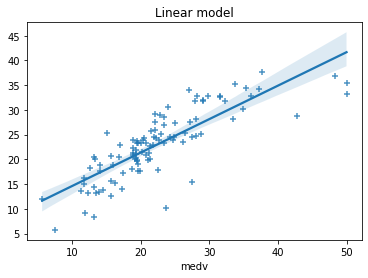

In [33]:
file_path = r"C:\Yahia\Python\ML\data\BostonHousing.csv"
boston_data = pd.read_csv(file_path)

y= boston_data.medv
X = boston_data.drop('medv', axis='columns')

# # Split into validation and training data
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2)

print ('************ Decision Tree one level ***************')
reg_decision_tree_1(train_X, val_X, train_y, val_y)

print ('\n************ Decision Tree multi level optimized ***************')
reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y)

print ('\n************ User Forest model regression ***************')
use_forest_regression(train_X, val_X, train_y, val_y)

print ('\n************ Linear Model ***************')
use_linear_model(train_X, val_X, train_y, val_y)


# Diabetes data set from skilearn

X.shape: (442, 10)  y.shape: (442,)
************ Decision Tree one level ***************
Mean squared Error (MSE): 5843.35
Mean absolute Error (MAE): 57.42
Coeffecint of determination (R2): 0.22

************ Decision Tree multi level optimized ***************
Max leaf nodes: 5  		 Mean Absolute Error:  54.87577772531823
Max leaf nodes: 25  		 Mean Absolute Error:  54.91656073835447
Max leaf nodes: 50  		 Mean Absolute Error:  50.71513136526776
Max leaf nodes: 100  		 Mean Absolute Error:  53.31326912787587
Max leaf nodes: 250  		 Mean Absolute Error:  55.20181915462815
Max leaf nodes: 500  		 Mean Absolute Error:  55.48314606741573
Mean squared Error (MSE): 509.47
Mean absolute Error (MAE): 17.81
Coeffecint of determination (R2): 0.93

************ User Forest model regression ***************
Mean squared Error (MSE): 3927.78
Mean absolute Error (MAE): 52.92
Coeffecint of determination (R2): 0.47

************ Linear Model ***************
Mean squared Error (MSE): 3788.94
Mean absolut

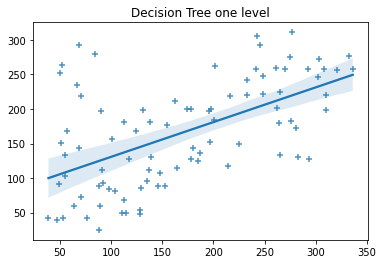

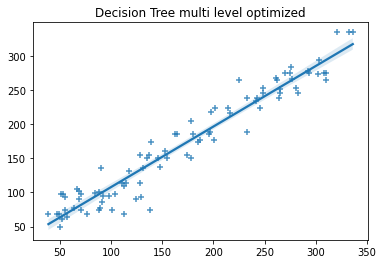

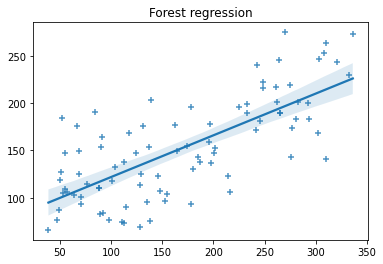

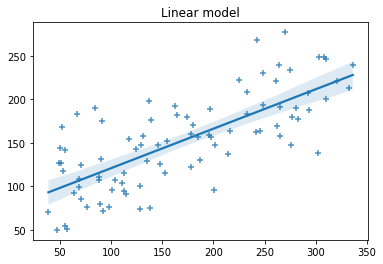

In [53]:
from sklearn import datasets

# diabetes = datasets.load_diabetes(return_X_y=True)
diabetes = datasets.load_diabetes()
y = diabetes.target
X = diabetes.data

# Split into validation and training data
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2)

print ("X.shape:", X.shape, " y.shape:", y.shape)
print ('************ Decision Tree one level ***************')
reg_decision_tree_1(train_X, val_X, train_y, val_y)

print ('\n************ Decision Tree multi level optimized ***************')
reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y)

print ('\n************ User Forest model regression ***************')
use_forest_regression(train_X, val_X, train_y, val_y)

print ('\n************ Linear Model ***************')
use_linear_model(train_X, val_X, train_y, val_y)


In [ ]:
diabetes